# Figures for _"Hot" Non-flaring Plasma in Active Regions II. Impacts of Two-fluid Effects_ Paper

In [6]:
#Import needed libraries
import sys
from imp import reload
import numpy as np
sys.path.append('/home/wtb2/Documents/EBTEL_analysis/src/')
import ebtel_dem as ebd
import ebtel_plot_em as ebpe
%matplotlib inline
reload(ebd)
reload(ebpe)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'ebtel_plot_em' from '/home/wtb2/Documents/EBTEL_analysis/src/ebtel_plot_em.py'>

Here, we are just going to test out some figure sizes and see which sizes work the best in the paper. Then, we'll use these sizes and print our figures in bulk.

## Electron Case

In [7]:
#Needed parameters
root_dir = '/data/datadrive2/EBTEL-2fluid_runs/'
root_paper = '/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/'
species='electron'
alpha='2.5'
t_wait_q_scaling='-b1.0'
loop_length=40.0
tpulse=100.0
solver='rka4'
t_wait = np.arange(250,5250,250)
slope_limits = {'cool_lower':6.0,'cool_upper':6.6,'hot_lower':6.8,'hot_upper':7.3}
lim_method = 'dynamic'
fit_method = 'fit_all'
max_percent_drop = 0.92
delta_t = 0.5
figname = 'ebtel_L%.1f_tpulse%.1f_alpha%s'%(loop_length,tpulse,alpha) + str(t_wait_q_scaling) + '_%s_heating'%(species)

In [8]:
#Instantiate Process class
processer = ebd.DEMProcess(root_dir,species,alpha,loop_length,tpulse,solver,
                           t_wait_q_scaling=t_wait_q_scaling,verbose=True,em_cutoff=23.0)
#Import the data
processer.import_raw(t_wait)
#Compute mean and standard deviation for EM 
processer.calc_stats()

#Instantiate Analyze class
analyzer = ebd.DEMAnalyze(tuple(processer.em), tuple(processer.temp_em),
                          tuple(processer.em_mean), tuple(processer.temp_mean),
                          tuple(processer.em_std), verbose=False, slope_limits=slope_limits,
                          fit_method=fit_method, lim_method=lim_method, delta_t=delta_t,
                          max_percent_drop=max_percent_drop)
#Filter and interpolate EM curves
analyzer.interp_and_filter()
#Fit all curves
analyzer.many_fits()

Unable to process file for Tn = 250, run = 44
Unable to process file for Tn = 250, run = 45
Unable to process file for Tn = 250, run = 46
Unable to process file for Tn = 250, run = 47
Unable to process file for Tn = 250, run = 48
Unable to process file for Tn = 250, run = 49
Reached end of list or too many missing files.
Estimated percentage of files read = 100.000000 %
Unable to process file for Tn = 500, run = 75
Unable to process file for Tn = 500, run = 76
Unable to process file for Tn = 500, run = 77
Unable to process file for Tn = 500, run = 78
Unable to process file for Tn = 500, run = 79
Unable to process file for Tn = 500, run = 80
Reached end of list or too many missing files.
Estimated percentage of files read = 100.000000 %
Unable to process file for Tn = 750, run = 106
Unable to process file for Tn = 750, run = 107
Unable to process file for Tn = 750, run = 108
Unable to process file for Tn = 750, run = 109
Unable to process file for Tn = 750, run = 110
Unable to process f

In [9]:
#Calculate temperature vectors for printing fit lines
th = []
tc = []
for k in range(len(analyzer.hot_fits)):
    sl = analyzer.fit_limits(analyzer.temp_mean[k],analyzer.em_mean[k])
    tc.append(np.linspace(sl['cool_lower'],sl['cool_upper'],10))
    th.append(np.linspace(sl['hot_lower'],sl['hot_upper'],10))
fit_lines = {'t_cool':tc,'t_hot':th}

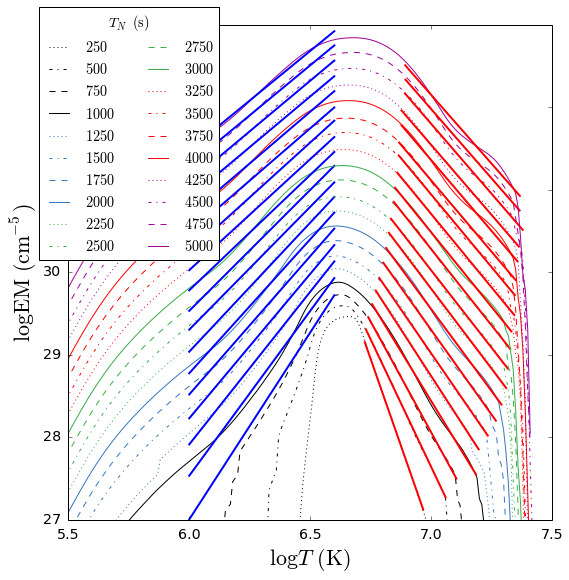

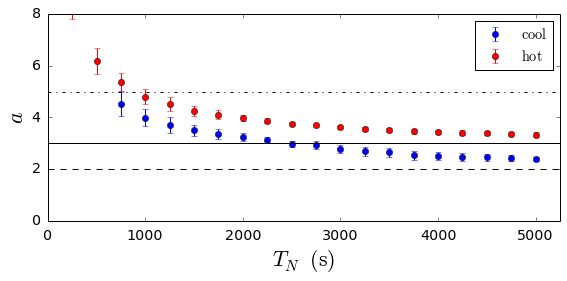

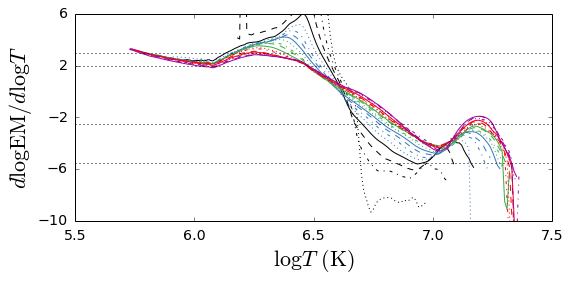

In [10]:
#Instantiate Plotter class
plotter = ebpe.DEMPlotter(processer.temp_em, processer.em, processer.temp_mean, processer.em_mean,
                          processer.em_std, analyzer.cool_fits, analyzer.hot_fits, figsize=(8,8),
                          alfs=0.65, dpi=1000, format='pdf', fs=22)
#Build composite EM plot
plotter.plot_em_curves(fit_lines=fit_lines, print_fig_filename=root_paper + figname + '_dem')
#Build composite slope plot
plotter.figsize=(8,4)
plotter.plot_em_slopes(print_fig_filename=root_paper + figname + '_hs_compare')
#Build derivatives plots
plotter.plot_em_derivs(print_fig_filename=root_paper + figname + '_dem_derivs')

## Ion Case

In [20]:
#change a few parameters
species = 'ion'
slope_limits = {'cool_lower':6.0,'cool_upper':6.6,'hot_lower':7.2,'hot_upper':7.3}
lim_method = 'static'
figname = 'ebtel_L%.1f_tpulse%.1f_alpha%s'%(loop_length,tpulse,alpha) + str(t_wait_q_scaling)+ '_%s_heating'%(species)

In [21]:
#instantiate process and analyze classes
#Instantiate Process class
processer = ebd.DEMProcess(root_dir,species,alpha,loop_length,tpulse,solver,
                           t_wait_q_scaling=t_wait_q_scaling,verbose=True,em_cutoff=23.0)
#Import the data
processer.import_raw(t_wait)
#Compute mean and standard deviation for EM 
processer.calc_stats()

#Instantiate Analyze class
analyzer = ebd.DEMAnalyze(tuple(processer.em), tuple(processer.temp_em),
                          tuple(processer.em_mean), tuple(processer.temp_mean),
                          tuple(processer.em_std), verbose=False, slope_limits=slope_limits,
                          fit_method=fit_method, lim_method=lim_method, delta_t=delta_t,
                          max_percent_drop=max_percent_drop)
#Filter and interpolate EM curves
analyzer.interp_and_filter()
#Fit all curves
analyzer.many_fits()

Unable to process file for Tn = 250, run = 44
Unable to process file for Tn = 250, run = 45
Unable to process file for Tn = 250, run = 46
Unable to process file for Tn = 250, run = 47
Unable to process file for Tn = 250, run = 48
Unable to process file for Tn = 250, run = 49
Reached end of list or too many missing files.
Estimated percentage of files read = 100.000000 %
Unable to process file for Tn = 500, run = 75
Unable to process file for Tn = 500, run = 76
Unable to process file for Tn = 500, run = 77
Unable to process file for Tn = 500, run = 78
Unable to process file for Tn = 500, run = 79
Unable to process file for Tn = 500, run = 80
Reached end of list or too many missing files.
Estimated percentage of files read = 100.000000 %
Unable to process file for Tn = 750, run = 106
Unable to process file for Tn = 750, run = 107
Unable to process file for Tn = 750, run = 108
Unable to process file for Tn = 750, run = 109
Unable to process file for Tn = 750, run = 110
Unable to process f

In [22]:
#Calculate temperature vectors for printing fit lines
th = []
tc = []
for k in range(len(analyzer.hot_fits)):
    sl = analyzer.fit_limits(analyzer.temp_mean[k],analyzer.em_mean[k])
    tc.append(np.linspace(sl['cool_lower'],sl['cool_upper'],10))
    th.append(np.linspace(sl['hot_lower'],sl['hot_upper'],10))
fit_lines = {'t_cool':tc,'t_hot':th}


In [23]:
#Instantiate Plotter class
plotter = ebpe.DEMPlotter(processer.temp_em, processer.em, processer.temp_mean, processer.em_mean,
                          processer.em_std, analyzer.cool_fits, analyzer.hot_fits, figsize=(8,8),
                          alfs=0.65, dpi=1000, format='pdf', fs=22)
#Build composite EM plot
plotter.plot_em_curves(fit_lines=fit_lines, print_fig_filename=root_paper + figname + '_dem')
#Build composite slope plot
plotter.figsize=(8,4)
plotter.plot_em_slopes(print_fig_filename=root_paper + figname + '_hs_compare')
#Build derivatives plots
plotter.plot_em_derivs(print_fig_filename=root_paper + figname + '_dem_derivs')

## Single-fluid Case

In [24]:
#change a few parameters
root_dir = '/data/datadrive2/EBTEL_C_runs/'
species = 'single'
slope_limits = {'cool_lower':6.0,'cool_upper':6.6,'hot_lower':6.8,'hot_upper':7.3}
lim_method = 'dynamic'
figname = 'ebtel_L%.1f_tpulse%.1f_alpha%s'%(loop_length,tpulse,alpha) + str(t_wait_q_scaling)+ '_%s_heating'%(species)

In [25]:
#Instantiate Process class
processer = ebd.DEMProcess(root_dir,species,alpha,loop_length,tpulse,solver,
                           t_wait_q_scaling=t_wait_q_scaling,verbose=True,em_cutoff=23.0)
#Import the data
processer.import_raw(t_wait)
#Compute mean and standard deviation for EM 
processer.calc_stats()

#Instantiate Analyze class
analyzer = ebd.DEMAnalyze(tuple(processer.em), tuple(processer.temp_em),
                          tuple(processer.em_mean), tuple(processer.temp_mean),
                          tuple(processer.em_std), verbose=False, slope_limits=slope_limits,
                          fit_method=fit_method, lim_method=lim_method, delta_t=delta_t,
                          max_percent_drop=max_percent_drop)
#Filter and interpolate EM curves
analyzer.interp_and_filter()
#Fit all curves
analyzer.many_fits()

Unable to process file for Tn = 250, run = 44
Unable to process file for Tn = 250, run = 45
Unable to process file for Tn = 250, run = 46
Unable to process file for Tn = 250, run = 47
Unable to process file for Tn = 250, run = 48
Unable to process file for Tn = 250, run = 49
Reached end of list or too many missing files.
Estimated percentage of files read = 100.000000 %
Unable to process file for Tn = 500, run = 75
Unable to process file for Tn = 500, run = 76
Unable to process file for Tn = 500, run = 77
Unable to process file for Tn = 500, run = 78
Unable to process file for Tn = 500, run = 79
Unable to process file for Tn = 500, run = 80
Reached end of list or too many missing files.
Estimated percentage of files read = 100.000000 %
Unable to process file for Tn = 750, run = 106
Unable to process file for Tn = 750, run = 107
Unable to process file for Tn = 750, run = 108
Unable to process file for Tn = 750, run = 109
Unable to process file for Tn = 750, run = 110
Unable to process f

In [26]:
#Calculate temperature vectors for printing fit lines
th = []
tc = []
for k in range(len(analyzer.hot_fits)):
    sl = analyzer.fit_limits(analyzer.temp_mean[k],analyzer.em_mean[k])
    tc.append(np.linspace(sl['cool_lower'],sl['cool_upper'],10))
    th.append(np.linspace(sl['hot_lower'],sl['hot_upper'],10))
fit_lines = {'t_cool':tc,'t_hot':th}

In [27]:
#Instantiate Plotter class
plotter = ebpe.DEMPlotter(processer.temp_em, processer.em, processer.temp_mean, processer.em_mean,
                          processer.em_std, analyzer.cool_fits, analyzer.hot_fits, figsize=(8,8),
                          alfs=0.65, dpi=1000, format='pdf', fs=22)
#Build composite EM plot
plotter.plot_em_curves(fit_lines=fit_lines, print_fig_filename=root_paper + figname + '_dem')
#Build composite slope plot
plotter.figsize=(8,4)
plotter.plot_em_slopes(print_fig_filename=root_paper + figname + '_hs_compare')
#Build derivatives plots
plotter.plot_em_derivs(print_fig_filename=root_paper + figname + '_dem_derivs')